[*********************100%%**********************]  1 of 1 completed


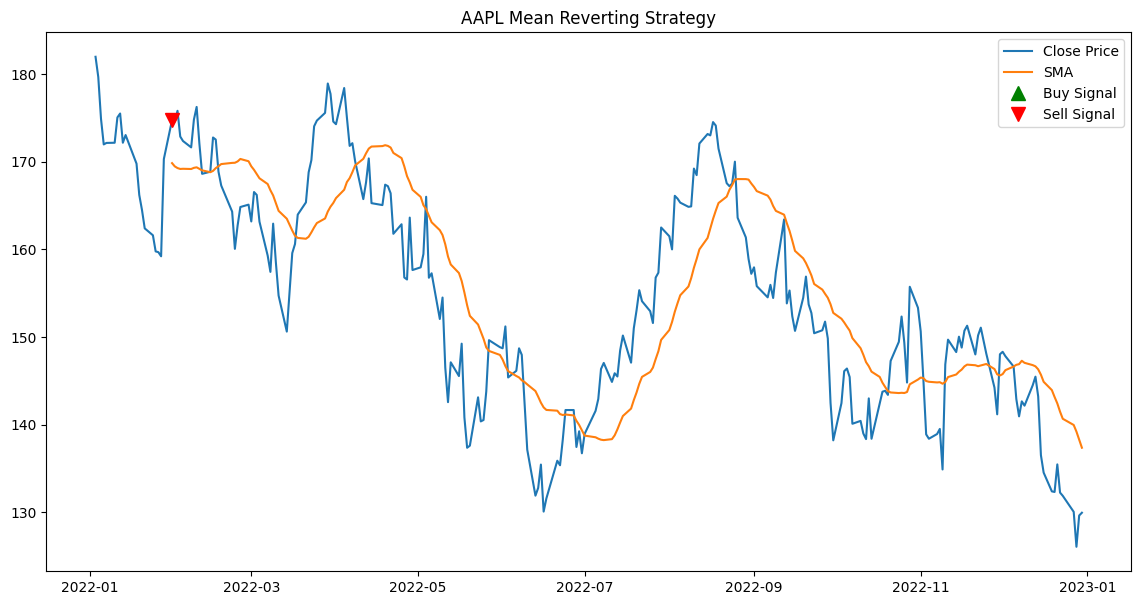

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Define the window for the moving average
window = 20

# Calculate the moving average
data['SMA'] = data['Close'].rolling(window=window).mean()

# Define the mean reverting trading strategy
def mean_reverting_strategy(data, window):
    data['Position'] = 0
    data['Position'] = data.apply(lambda row: 1 if row['Close'] < row['SMA'] else (-1 if row['Close'] > row['SMA'] else 0), axis=1)
    data['Signal'] = data['Position'].diff()
    return data

# Apply the strategy
data = mean_reverting_strategy(data, window)

# Plot the strategy signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA'], label='SMA')

# Plot buy signals
buy_signals = data[data['Signal'] == 1]
plt.plot(buy_signals.index, buy_signals['Close'], '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
sell_signals = data[data['Signal'] == -1]
plt.plot(sell_signals.index, sell_signals['Close'], 'v', markersize=10, color='r', label='Sell Signal')

plt.title(f'{symbol} Mean Reverting Strategy')
plt.legend()
plt.show()
